# Predicting Comment Score

In [1]:
import pandas as pd; import numpy as np; 
from scipy.sparse import csr_matrix
import nltk
import math; import time
# import enchant; english_dict = enchant.Dict("en_US")
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#from html.parser import HTMLParser
from sklearn.cross_validation import StratifiedKFold
from sklearn import linear_model
from sklearn import metrics
# from stemming.porter2 import stem
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, \
                             stop_words = None, max_features = 5000) 

import seaborn
import matplotlib
from matplotlib import pyplot as plt
#from matplotlib import pylab
%matplotlib inline

#%pylab inline
#pylab.rcParams['figure.figsize'] = (20, 5)

# Tsne
from sklearn import manifold

In [2]:
font = {'weight' : 'normal',
        'size'   : 22}

axes = {'titlesize'  : 22,
        'labelsize'  : 22}

legend = {'fontsize'  : 22}

figure = {'figsize'  : (10,5)}

matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('legend', **legend)
matplotlib.rc('figure', **figure)

## 1 Data

### 1.1 Import cleaned comments

In [3]:
from nba_data_types import load_nba


### 1.2 Extract features

In [4]:
(dft, s_BOW, s_TFI) = load_nba()

(533919, 5000)


In [5]:
dft.head(n=2)

,Unnamed: 0,Unnamed: 0.1,comment,comment_utc,comment_score,link,title,score,submission_utc,subreddit,submission_id,self_url,body,timedifference
0,0,0,bruh,1.456792e+09,1,http://reddit.com/r/nba/comments/48dhcw/c/d0iqq9r,warriors dominant,0.0,1.456790e+09,nba,48dhcw,https://www.reddit.com/r/nba/comments/48dhcw,NaN,1580.0
1,1,1,go http ftve akamaihd net hls live room k prog u,1.459384e+09,1,http://reddit.com/r/nba/comments/4cnbpg/c/d1jt5ev,game thread los angeles clippers minnesota tim...,25.0,1.459296e+09,nba,4cnbpg,https://www.reddit.com/r/nba/comments/4cnbpg,reddit stream must click link comment page pro...,87579.0


## number of features to use???

What values to use??
occurred in too many documents (max_df): don't need to worry about this one!
occurred in too few documents (min_df): 
were cut off by feature selection (max_features)



# Visualize bag of words + tf_idf

In [11]:
a_BOW = s_BOW.toarray()
a_TFI = s_TFI.toarray()
print(a_BOW.shape)
print(a_TFI.shape)

(533919, 5000)
(533919, 5000)


To visualize, we need a smaller dataset than .5 million points. We can visualize what this data set looks like by taking a random sample of *200* points


http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#example-manifold-plot-compare-methods-py
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [12]:
bow_small = a_BOW[np.random.randint(low=0,high=a_BOW.shape[0], size=5000), :]
tfi_small = a_TFI[np.random.randint(low=0,high=a_TFI.shape[0], size=5000), :]

# check to make sure (5000,5000)
print(bow_small.shape)

(5000, 5000)


t-SNE: 4.5e+02 sec


(-31.498228617648991,
 64.579808447321881,
 -29.347384617028073,
 44.088376903842907)

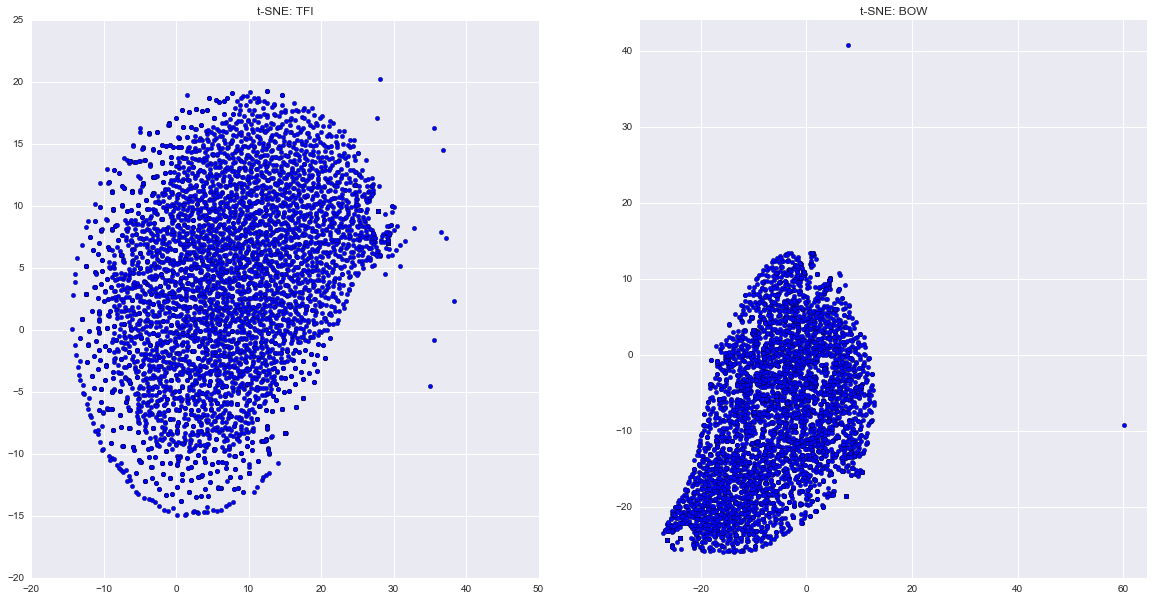

In [15]:
t0 = time.time()

# Perform TSNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
Y_tfi = tsne.fit_transform(tfi_small)
Y_bow = tsne.fit_transform(bow_small)

# Print out timing
t1 = time.time()
print("t-SNE: %.2g sec" % (t1 - t0))

# Generate plots
f,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].scatter(Y_tfi[:, 0], Y_tfi[:, 1])#, cmap=plt.cm.Spectral)
ax[0].set_title("t-SNE: TFI")
ax[1].scatter(Y_bow[:, 0], Y_bow[:, 1])#, cmap=plt.cm.Spectral)
ax[1].set_title("t-SNE: BOW")
plt.axis('tight')